In [63]:
#Import the relevant libraries
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sig/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#Retrieve a copy of the text from the url
text_file = urllib.request.urlopen("https://www.gutenberg.org/cache/epub/64317/pg64317.txt")

#Read and decode the text
text = text_file.read().decode('utf-8')

#Preview a section of the text
print(text[1400:2000])

                            I

In my younger and more vulnerable years my father gave me some advice
that I’ve been turning over in my mind ever since.

“Whenever you feel like criticizing anyone,” he told me, “just
remember that all the people in this world haven’t had the advantages
that you’ve had.”

He didn’t say any more, but we’ve always been unusually communicative
in a reserved way, and I understood that he meant a great deal more
than that. In consequence, I’m inclined to reserve all judgements, a
habit that has opened up many curious natures to me and also made me
the vi


In [3]:
#tokenize text by words
words = word_tokenize(text)

#check the number of words
print(f"The total number of words in the text is {len(words)}")

The total number of words in the text is 64006


In [4]:
#find the frequency of words
fdist = FreqDist(words)

#print the 10 most common words
fdist.most_common(10)

[(',', 3111),
 ('.', 2471),
 ('the', 2377),
 ('and', 1540),
 ('“', 1457),
 ('”', 1455),
 ('a', 1390),
 ('I', 1377),
 ('’', 1346),
 ('of', 1208)]

In [5]:
#create an empty list to store words
words_no_punc = []

#iterate through the words list to remove punctuations
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())

#print number of words without punctuation
print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 50927


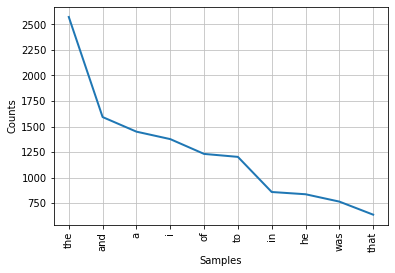

In [6]:
#find the frequency of words
fdist = FreqDist(words_no_punc)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

In [7]:
#Download and import list of stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

#list of stopwords
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/sig/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 23783


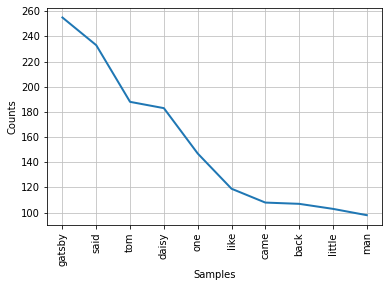

In [15]:
#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

In [31]:
#Update the stopwords list
stopwords_list.extend(["said","one","like","came","back"])

#create an empty list to store clean words
clean_words = []

for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

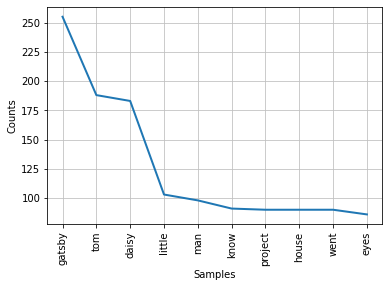

In [34]:
#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

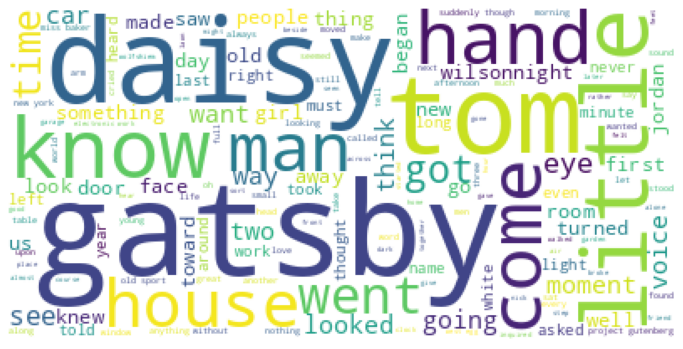

In [41]:
#Convert word list to a single string
clean_words_string = " ".join(clean_words)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()